In [5]:
%pip install -q transformers fugashi ipadic sentencepiece matplotlib scikit-learn 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from transformers import BertJapaneseTokenizer, BertModel
import torch

c:\WorkSpace\Practice\env2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class SentenceBertJapanese:
    def __init__(self, model_name_or_path, device=None):
        self.tokenizer = BertJapaneseTokenizer.from_pretrained(model_name_or_path)
        self.model = BertModel.from_pretrained(model_name_or_path)
        self.model.eval()

        if device is None:
            device = "cuda" if torch.cuda.is_available() else "cpu"
        self.device = torch.device(device)
        self.model.to(device)

    def _mean_pooling(self, model_output, attention_mask):
        token_embeddings = model_output[0] #First element of model_output contains all token embeddings
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    @torch.no_grad()
    def encode(self, sentences, batch_size=8):
        all_embeddings = []
        iterator = range(0, len(sentences), batch_size)
        for batch_idx in iterator:
            batch = sentences[batch_idx:batch_idx + batch_size]

            # encoded_input = self.tokenizer.batch_encode_plus(batch, padding="longest", 
            #                                truncation=True, return_tensors="pt").to(self.device)
            encoded_input = self.tokenizer.batch_encode_plus(batch, padding="max_length", max_length=512,
                                           truncation=True, return_tensors="pt").to(self.device)
            model_output = self.model(**encoded_input)
            sentence_embeddings = self._mean_pooling(model_output, encoded_input["attention_mask"]).to('cpu')

            all_embeddings.extend(sentence_embeddings)

        # return torch.stack(all_embeddings).numpy()
        return torch.stack(all_embeddings)

In [4]:
# テキストファイルを読み込み、各文をリストに格納
def read_sentences_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        sentences = f.read().splitlines()
    return sentences

In [8]:
#model = SentenceBertJapanese("sonoisa/sentence-bert-base-ja-mean-tokens")
#model = SentenceBertJapanese("sonoisa/sentence-bert-base-ja-mean-tokens-v2")
#model = SentenceBertJapanese("sonoisa/sentence-bert-base-ja-en-mean-tokens")
#model = SentenceBertJapanese("sonoisa/sentence-bert-base-ja-en-mean-tokens-v2")
#model = SentenceBertJapanese("tohoku-nlp/bert-base-japanese")

In [12]:
# モデルの初期化
model1 = SentenceBertJapanese("sonoisa/sentence-bert-base-ja-mean-tokens-v2")
model2 = SentenceBertJapanese("tohoku-nlp/bert-base-japanese")
model3 = SentenceBertJapanese("tohoku-nlp/bert-base-japanese-v3")
model4 = SentenceBertJapanese("tohoku-nlp/bert-base-japanese-char-v3")
model5 = SentenceBertJapanese("tohoku-nlp/bert-large-japanese-v2")
model6 = SentenceBertJapanese("tohoku-nlp/bert-large-japanese-char-v2")

c:\WorkSpace\Practice\env2\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at tohoku-nlp/bert-base-japanese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of

In [7]:
model = [SentenceBertJapanese("sonoisa/sentence-bert-base-ja-mean-tokens-v2"),
         SentenceBertJapanese("tohoku-nlp/bert-base-japanese"),
         SentenceBertJapanese("tohoku-nlp/bert-base-japanese-v3"),
         SentenceBertJapanese("tohoku-nlp/bert-base-japanese-char-v3"),
         SentenceBertJapanese("tohoku-nlp/bert-large-japanese-v2"),
         SentenceBertJapanese("tohoku-nlp/bert-large-japanese-char-v2")
         ]

c:\WorkSpace\Practice\env2\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at tohoku-nlp/bert-base-japanese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of

In [9]:
""" s1 = "日本の風土の特質が日本の歴史と文化に大きな影響を与える。"
s2 = "島国の日本は、四周を海にかこまれ世界から隔てられている。"
s3 = "この地理的条件によって、日本は外敵の侵略と異民族の支配がなく、周囲から文化や技術などを吸収し、「島国」の中でそれを融和させて、独自の文化を磨きあげ築きあげてきたのである。"
s4 = "外国との交通が海に隔てられ、発信的な文化型は形成しにくいので、自ら外国の文化を積極的に受けいれる受信的な文化型を形成してきた。"
s5 = "日本文化の本質は受信文化である。"
s6 = "外来文化の受信能力が世界一である日本から発信することはほとんどない。"
s7 = "日本は外来文化を選択して受信するだけにとどまらず、さらに受信した外来文化を巧みに融合して日本化する。"
s8 = "古代朝鮮や中国から漢字や儒教、仏教、道教など宗教思想を導入し、近代欧米の新文明を吸収し、更にそれを自国に適応しようと、工夫に努めた。"
s9 = "受信文化の特徴として、選択の可能性があること。"
s10 = "日本は海に守られて外来侵略と異民族の支配がないため、受け入れる側の意識や都合を無視されるような押し付け、強制的な外来文化の受信は全くない。"
s = model.encode([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10]) """

In [13]:
file_path = "E:\実験\実験結果/18.文章25\文章25.txt"
sentences = read_sentences_from_file(file_path)

In [14]:
vecs1 = model1.encode(sentences)
vecs2 = model2.encode(sentences)
vecs3 = model3.encode(sentences)
vecs4 = model4.encode(sentences)
vecs5 = model5.encode(sentences)
vecs6 = model6.encode(sentences)

In [19]:
vecs1

tensor([[-0.3650,  0.1818,  0.5505,  ..., -0.2259, -0.7063, -0.7548],
        [ 0.1720,  0.2776,  0.6900,  ..., -0.3740, -0.0733, -0.0556],
        [ 0.2847,  0.2308,  0.2250,  ..., -0.6524, -0.8757,  0.2180],
        ...,
        [ 0.3486,  0.2365,  0.9431,  ..., -1.1324, -0.0465, -0.1606],
        [ 0.2822, -0.0033,  0.3433,  ..., -0.7612, -0.9835,  0.0612],
        [ 0.1754,  0.1795,  0.3783,  ..., -0.7274, -0.6922, -0.1798]])

In [23]:
norms = torch.norm(vecs1, dim=1)
norms

tensor([18.2273, 16.0171, 16.8312, 17.8376, 17.4252, 15.6303, 16.8778, 14.6456,
        17.2324, 16.8812, 15.7614, 17.3208, 17.6782, 16.4869, 16.3667, 17.4720,
        15.3397, 16.2453, 15.2431, 17.2153, 16.0594, 17.3052, 16.2992, 15.1292,
        15.7424, 15.2024, 14.9324, 15.0692, 17.3053, 17.5162, 16.7776, 17.1437])

: 

In [6]:
sentences[0]

'よく、「哲学は全ての学問の根本だ」と言われる。'

In [10]:
#print(s)
print(s[0])

tensor([ 7.9501e-01,  4.2832e-01,  5.7097e-01, -9.9771e-01,  1.0295e+00,
        -4.1838e-01, -3.5023e-02,  4.2088e-01, -2.2459e-01,  1.0510e-01,
         6.6542e-01, -7.8032e-02,  1.4388e+00,  8.4343e-02,  4.3397e-01,
         3.5788e-01, -4.1913e-02, -3.3836e-01, -3.4467e-01,  7.1055e-01,
        -3.7201e-01, -1.6260e+00,  3.2666e-03, -1.9825e-01, -7.2049e-01,
        -1.2461e-02,  6.0692e-01,  8.1143e-01,  9.0956e-01,  5.5517e-02,
         8.5964e-01,  6.7907e-01,  1.6802e+00,  1.2101e+00,  2.2563e-01,
         1.8612e+00,  5.8702e-01,  9.0251e-01, -7.7090e-02, -1.0521e-02,
        -5.0967e-01,  8.3112e-01,  5.6210e-01, -1.0555e+00, -8.0159e-01,
         5.3029e-02, -8.9982e-02, -5.7912e-01,  8.9943e-01,  5.4319e-01,
         7.6000e-01, -1.0451e+00, -1.3616e+00,  3.4972e-01, -3.3496e-01,
        -3.1451e-01,  4.5984e-01,  8.8579e-01,  5.3405e-01, -8.9576e-01,
         9.2587e-01, -6.3041e-01, -9.1913e-01,  5.2885e-01,  3.6049e-01,
         3.6775e-01, -4.2587e-01,  9.1799e-01,  8.3

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
#解析し、ベクトル化されたものを格納(100次元のベクトル)
vec1 = model.encode(s1)
vec2 = model.encode(s2)
vec3 = model.encode(s3)
vec4 = model.encode(s4)
vec5 = model.encode(s5)
vec6 = model.encode(s6)
vec7 = model.encode(s7)
vec8 = model.encode(s8)
vec9 = model.encode(s9)
vec10 = model.encode(s10)



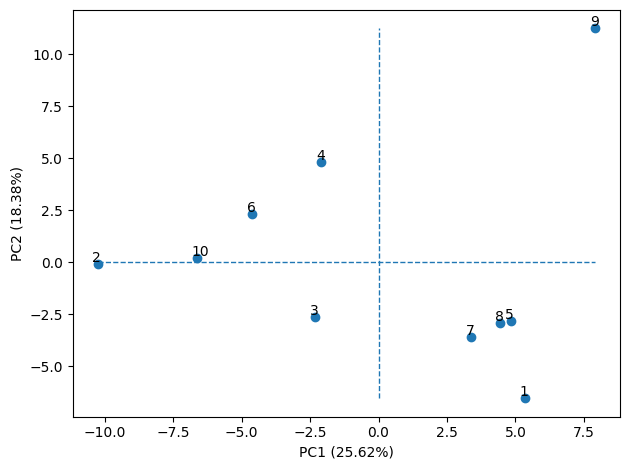

In [13]:
#主成分分析
#列方向（axis=0）に連結し、10*100行列を作成
#vectors = np.vstack((vec1, vec2, vec3, vec4, vec5, vec6, vec7, vec8, vec9, vec10))
vectors = np.vstack((s[0], s[1], s[2], s[3], s[4], s[5], s[6], s[7], s[8], s[9]))
#2次元に圧縮し学習
pca = PCA(n_components=2).fit(vectors)
trans = pca.fit_transform(vectors)
#寄与率を格納
pc_ratio = pca.explained_variance_ratio_

#plot
plt.figure()
plt.scatter(trans[:,0], trans[:,1])

i = 0
for txt in ['1','2','3','4','5','6','7','8','9','10']:
   #テキストを注釈として表示
   plt.text(trans[i,0]-0.2, trans[i,1]+0.1, txt)
   i += 1

plt.hlines(0, min(trans[:,0]), max(trans[:,0]), linestyle='dashed', linewidth=1)
plt.vlines(0, min(trans[:,1]), max(trans[:,1]), linestyle='dashed', linewidth=1)
plt.xlabel('PC1 ('+str(round(pc_ratio[0]*100,2))+'%)')
plt.ylabel('PC2 ('+str(round(pc_ratio[1]*100,2))+'%)')
plt.tight_layout()
plt.show()